In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import dill
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
# Boundary conditions for all maps (longitudes as x vals, latitudes as y vals)
lonmin = -76.72
lonmax = -76.52
latmin = 39.19
latmax = 39.38

In [6]:
# load the dilled dataframe
map_df = dill.load(open('dills/map_df_dynamicBW.dill'))

# number of points along each map edge
# (total number of points is npts**2)
npts = np.sqrt(len(map_df))

# generate appropriate lon/lat grid
x = np.linspace(lonmin, lonmax, npts)
y = np.linspace(latmin, latmax, npts)

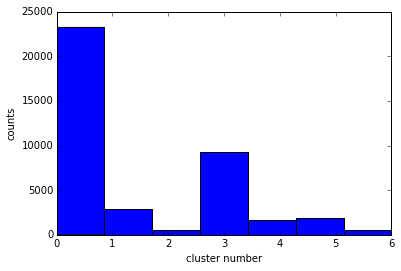

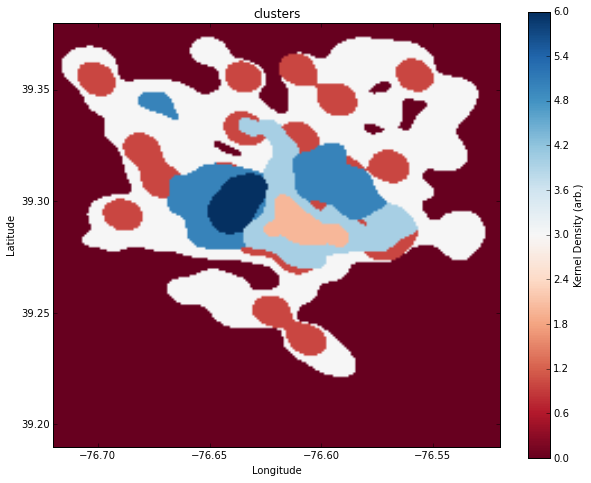

In [42]:
"""
First try at clustering!

Need to add method validation, i.e. silhouette coefficient, to determine n_clusters

This could be a really cool interactive plot.
"""
n_clusters = 7
model = KMeans(n_clusters=n_clusters)
model.fit(map_df)
neighborhoods = model.predict(map_df)
plt.hist(neighborhoods, bins=clusters)
plt.ylabel('counts')
plt.xlabel('cluster number')
plot_KDE(x, y, neighborhoods, 'clusters')

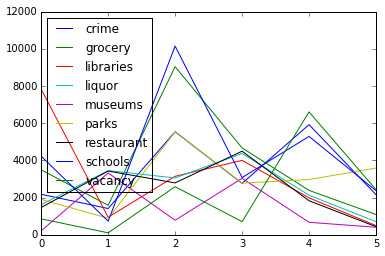

In [43]:
clusters_df = pd.DataFrame(columns=[u'crime', u'grocery', u'libraries', u'liquor', u'museums', u'parks',
       u'restaurant', u'schools', u'vacancy'])
for i in range(1, n_clusters):
    clusters_df.loc[i-1] = map_df.iloc[np.argwhere(neighborhoods == i).flatten()].sum(axis=0).values
    
clusters_df.plot()